## Building an ARIMA(Auto Regressive Integrated Moving Average Model)

### Best fit for Time-Series Data like Stock prices

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df2=pd.read_csv("Stocks_Data.csv")

In [4]:
df2.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock
0,0,2022-11-30 00:00:00-05:00,139.928537,147.172370,139.087391,146.489548,111380900,0.0,0.0,AAPL
1,1,2022-12-01 00:00:00-05:00,146.667651,147.578075,145.084296,146.766602,71250400,0.0,0.0,AAPL
2,2,2022-12-02 00:00:00-05:00,144.441081,146.459845,144.134294,146.271820,65447400,0.0,0.0,AAPL
3,3,2022-12-05 00:00:00-05:00,146.232231,149.349445,144.253044,145.104095,68826400,0.0,0.0,AAPL
4,4,2022-12-06 00:00:00-05:00,145.539503,145.767105,140.443088,141.422791,64727200,0.0,0.0,AAPL


In [5]:
df2.Date

0       2022-11-30 00:00:00-05:00
1       2022-12-01 00:00:00-05:00
2       2022-12-02 00:00:00-05:00
3       2022-12-05 00:00:00-05:00
4       2022-12-06 00:00:00-05:00
                  ...            
2510    2024-11-22 00:00:00-05:00
2511    2024-11-25 00:00:00-05:00
2512    2024-11-26 00:00:00-05:00
2513    2024-11-27 00:00:00-05:00
2514    2024-11-29 00:00:00-05:00
Name: Date, Length: 2515, dtype: object

In [6]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'] = pd.to_datetime(df2['Date'], utc=True).dt.date

In [7]:
df2.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock
0,0,2022-11-30,139.928537,147.172370,139.087391,146.489548,111380900,0.0,0.0,AAPL
1,1,2022-12-01,146.667651,147.578075,145.084296,146.766602,71250400,0.0,0.0,AAPL
2,2,2022-12-02,144.441081,146.459845,144.134294,146.271820,65447400,0.0,0.0,AAPL
3,3,2022-12-05,146.232231,149.349445,144.253044,145.104095,68826400,0.0,0.0,AAPL
4,4,2022-12-06,145.539503,145.767105,140.443088,141.422791,64727200,0.0,0.0,AAPL


In [8]:
df2.drop('Unnamed: 0',axis=1,inplace=True)
df2.drop('Stock',axis=1,inplace=True)


In [9]:
df2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-11-30,139.928537,147.172370,139.087391,146.489548,111380900,0.0,0.0
1,2022-12-01,146.667651,147.578075,145.084296,146.766602,71250400,0.0,0.0
2,2022-12-02,144.441081,146.459845,144.134294,146.271820,65447400,0.0,0.0
3,2022-12-05,146.232231,149.349445,144.253044,145.104095,68826400,0.0,0.0
4,2022-12-06,145.539503,145.767105,140.443088,141.422791,64727200,0.0,0.0


In [10]:
print(df2['Date'].dtype)

object


In [11]:
df2['Date']=pd.to_datetime(df2['Date'])

In [12]:
stocks=pd.DataFrame(df2)
stocks.head(20)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-11-30,139.928537,147.172370,139.087391,146.489548,111380900,0.0,0.0
1,2022-12-01,146.667651,147.578075,145.084296,146.766602,71250400,0.0,0.0
2,2022-12-02,144.441081,146.459845,144.134294,146.271820,65447400,0.0,0.0
3,2022-12-05,146.232231,149.349445,144.253044,145.104095,68826400,0.0,0.0
4,2022-12-06,145.539503,145.767105,140.443088,141.422791,64727200,0.0,0.0
5,2022-12-07,140.710289,141.878002,138.543077,139.473297,69721100,0.0,0.0
6,2022-12-08,140.878537,142.026469,139.631654,141.165512,62128300,0.0,0.0
7,2022-12-09,140.858707,144.055105,139.433691,140.680588,76097000,0.0,0.0
8,2022-12-12,141.215008,142.996280,139.592075,142.986389,70462700,0.0,0.0
9,2022-12-13,147.944238,148.409348,142.738981,143.956177,93886200,0.0,0.0


In [13]:
stocks.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [14]:
stocks.shape

(2515, 8)

In [15]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2515 non-null   datetime64[ns]
 1   Open          2515 non-null   float64       
 2   High          2515 non-null   float64       
 3   Low           2515 non-null   float64       
 4   Close         2515 non-null   float64       
 5   Volume        2515 non-null   int64         
 6   Dividends     2515 non-null   float64       
 7   Stock Splits  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 157.3 KB


In [16]:
stocks.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.000000,2515.0
mean,207.497431,209.995790,205.024488,207.615076,5.674858e+07,0.003264,0.0
std,89.849055,90.469540,89.043773,89.787548,4.147055e+07,0.043923,0.0
min,82.800003,83.480003,81.430000,81.820000,9.932800e+06,0.000000,0.0
25%,145.474891,146.873225,144.036688,145.477272,2.676535e+07,0.000000,0.0
50%,181.800003,183.949997,179.769528,181.742386,4.436130e+07,0.000000,0.0
75%,240.135002,244.160004,236.276582,240.437187,7.040210e+07,0.000000,0.0
max,465.228569,466.573450,462.698189,465.786438,3.186799e+08,0.830000,0.0


# Lets plot date vs closing price and see what it looks like

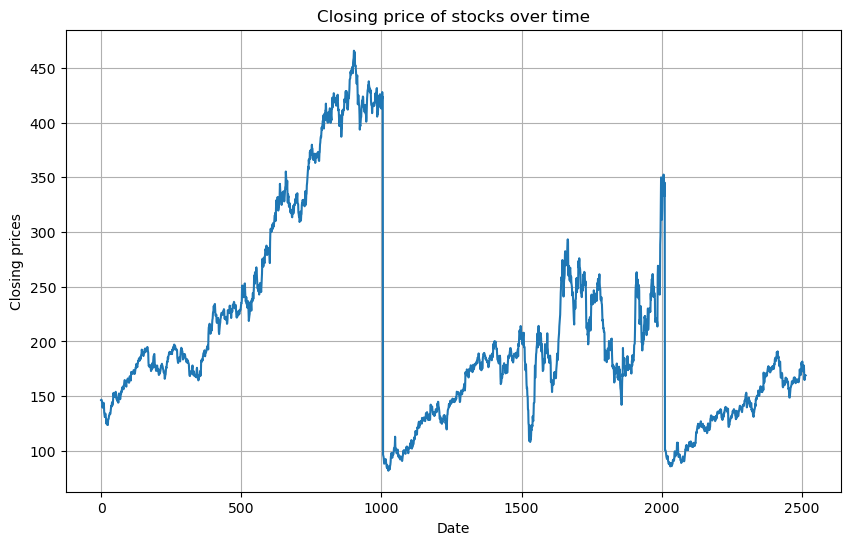

In [17]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Closing prices")
plt.title("Closing price of stocks over time")
plt.plot(stocks['Close'])
plt.show()

## Inference: It is very clear that the data is not stationary(Average closing price and its variance keeps on changing)

Text(0.5, 1.0, 'The Distribution of Closing price')

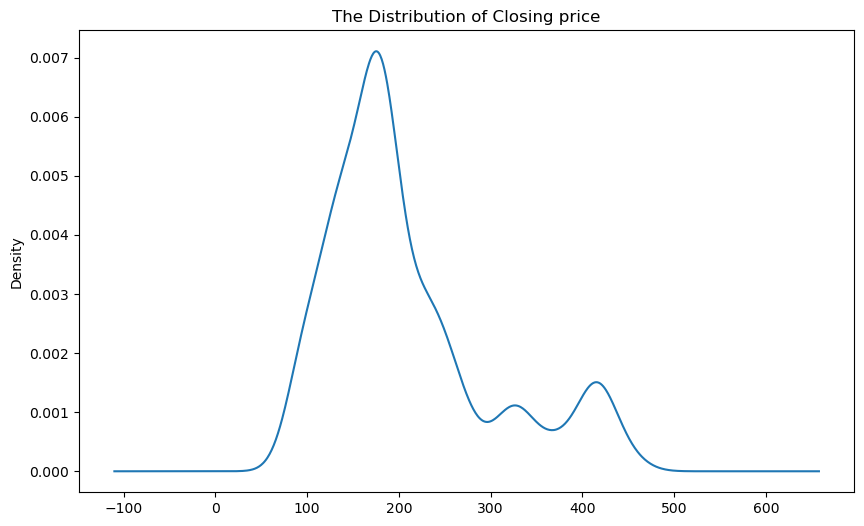

In [18]:
plt.figure(figsize=(10,6))

stocks['Close'].plot(kind='kde')
plt.title("The Distribution of Closing price")

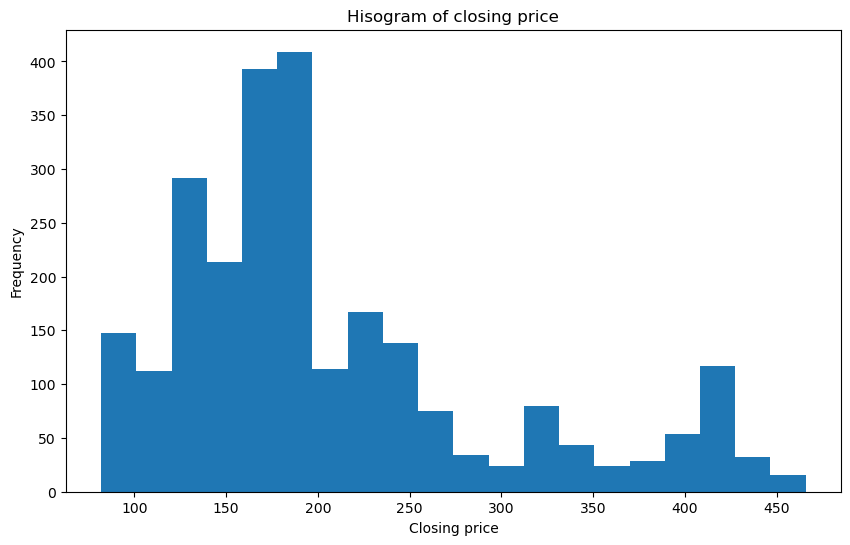

In [19]:
plt.figure(figsize=(10,6))
stocks['Close'].plot(style='k.', kind='hist', bins=20)
plt.title('Hisogram of closing price')
plt.xlabel("Closing price")
plt.ylabel("Frequency")
plt.show()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


C:\Users\hamsa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


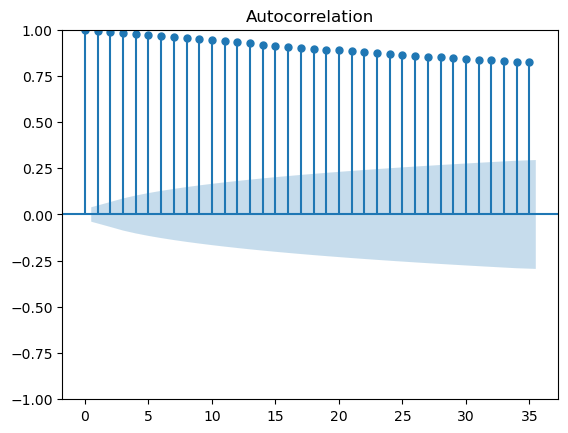

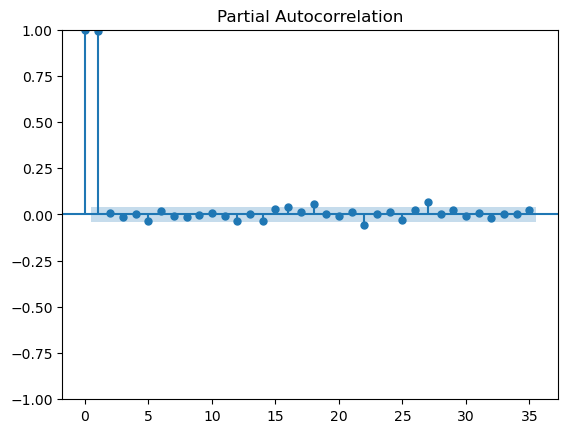

In [21]:
acf=plot_acf(stocks['Close'])
pacf=plot_pacf(stocks['Close'])

# Plotting the rolling mean and std dev

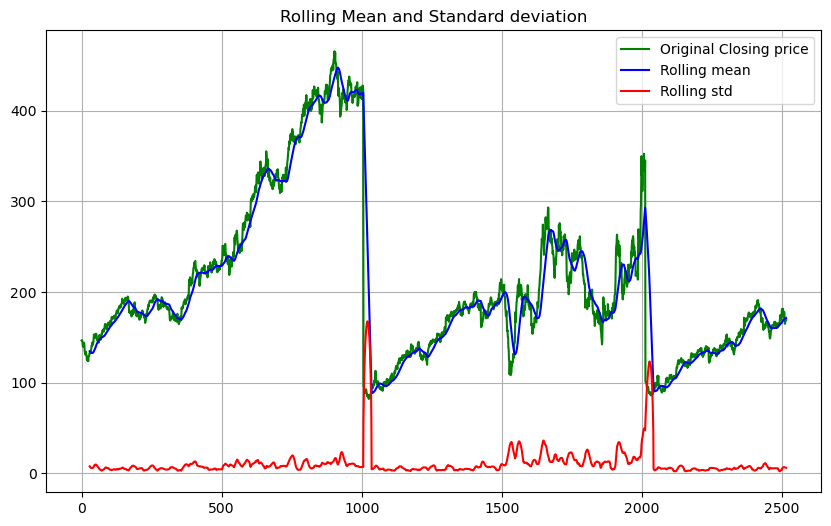

In [22]:
roll_mean=stocks['Close'].rolling(30).mean()
roll_std_dev=stocks['Close'].rolling(30).std()
plt.figure(figsize=(10,6))
plt.plot(stocks['Close'], color='green',label='Original Closing price')
plt.plot(roll_mean, color='blue',label='Rolling mean')
plt.plot(roll_std_dev, color='red',label='Rolling std')
plt.grid(True)
plt.legend(loc='best')
plt.title("Rolling Mean and Standard deviation")
plt.show()

## Inference: The moving average, std dev keeps changing.So,the data is non stationary. Let's conduct a hypothesis test(ADF test) to support our claim.

In [23]:
from statsmodels.tsa.stattools import adfuller
def ADF_Test(close):
    res=adfuller(close,autolag='AIC')
    print("ADF Test Statistics: ",res[0])
    print("P-value: ",res[1])
    print("Number of lags: ",res[2])
    print("Number of observations: ",res[3])
    for percent, val in res[4].items():
        print("Critical value",percent,":",val)
ADF_Test(stocks['Close'])

ADF Test Statistics:  -2.6499218235371536
P-value:  0.08311201631805731
Number of lags:  0
Number of observations:  2514
Critical value 1% : -3.4329538144697187
Critical value 5% : -2.8626903542179405
Critical value 10% : -2.567382377622466


### Conclusions of ADF Test: p value is higher than 0.05 and test statistics is higher than critical values, hence the data is Non stationary

<Figure size 640x480 with 0 Axes>

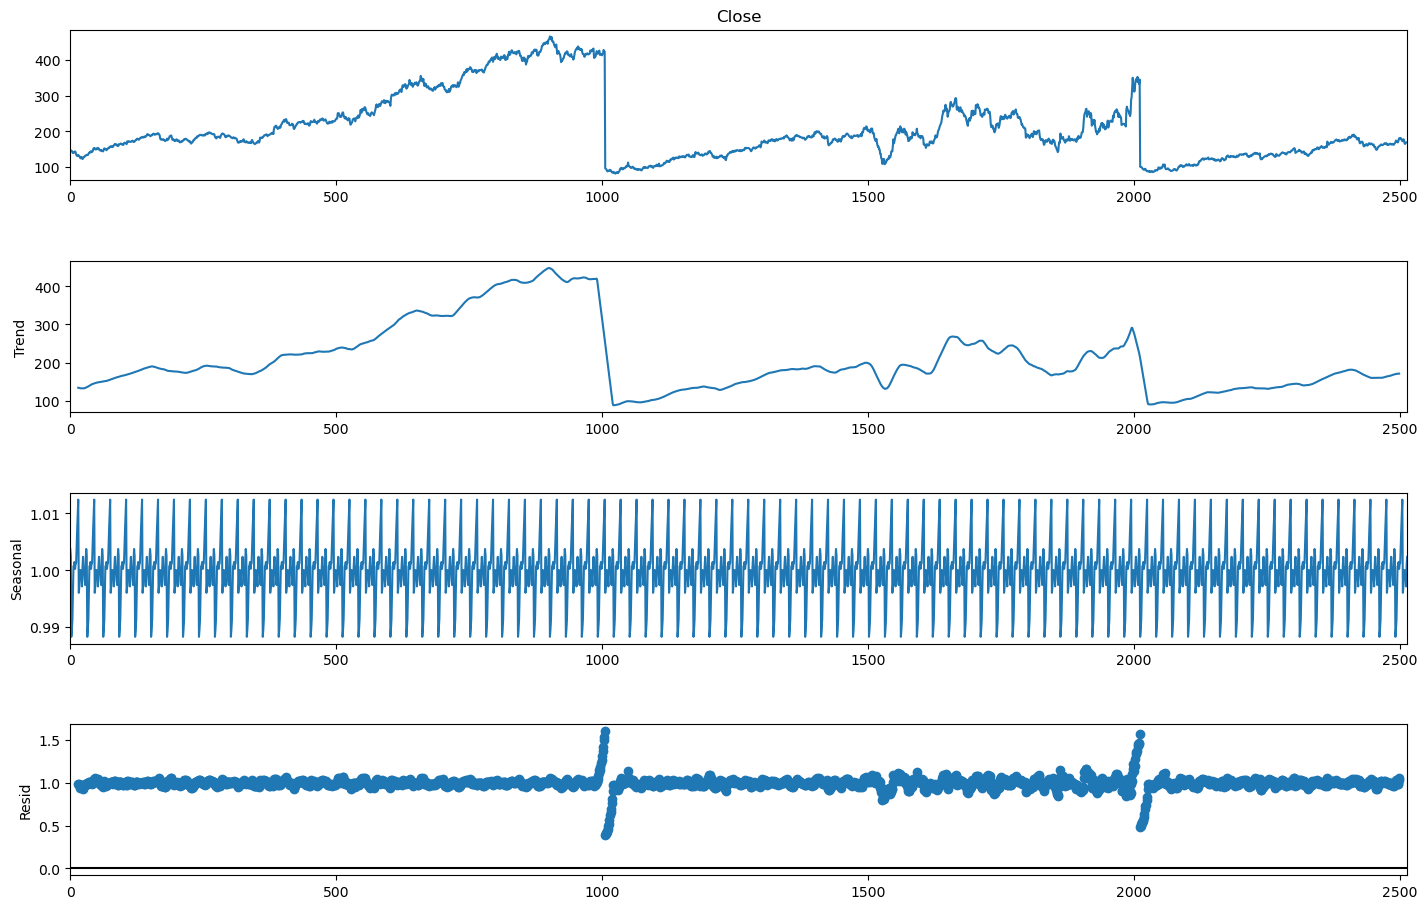

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stocks['Close'], model='multiplicative', period = 30)
graph = plt.figure()  
graph = result.plot()  
graph.set_size_inches(16, 10)

## Inference: There are fluctuations and seasonality in the data. It must be removed to make the data stationary

### We take log values of all the closing prices, to stabilize the variance and mean, making the data stationary.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


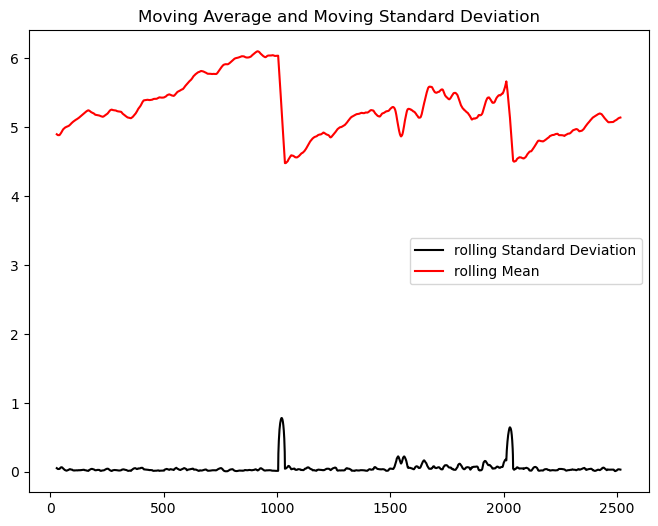

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
log_val = np.log(stocks['Close'])
moving_avg = log_val.rolling(30).mean()
std_dev = log_val.rolling(30).std()
plt.legend(loc='best')
plt.title('Moving Average and Moving Standard Deviation')
plt.plot(std_dev, color ="black", label = "rolling Standard Deviation")
plt.plot(moving_avg, color="red", label = "rolling Mean")
plt.legend()
plt.show()


### Inference: It has become a flat line, indicating "stationarity".

C:\Users\hamsa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


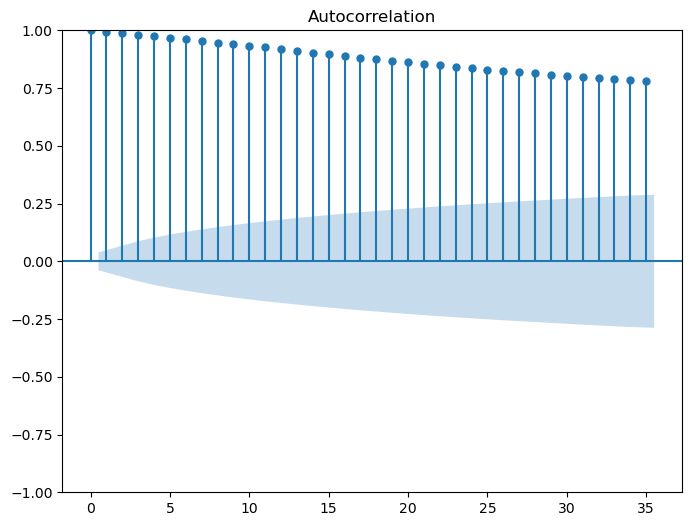

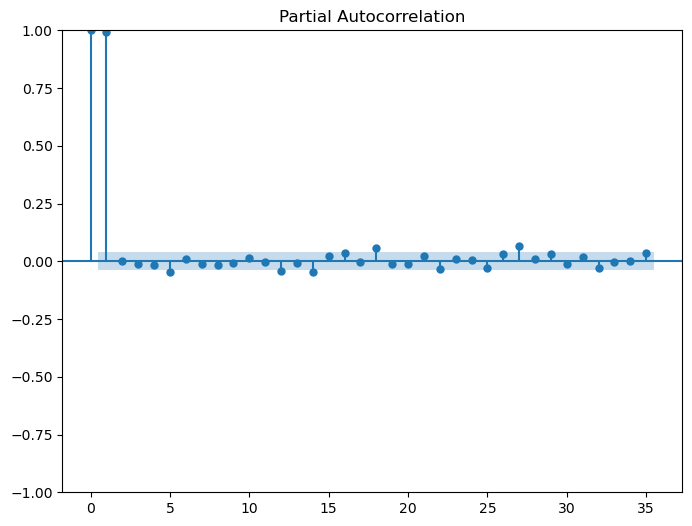

In [26]:
acf=plot_acf(log_val)
pacf=plot_pacf(log_val)

In [27]:
ADF_Test(log_val)

ADF Test Statistics:  -2.8180698450088104
P-value:  0.055738617915048014
Number of lags:  0
Number of observations:  2514
Critical value 1% : -3.4329538144697187
Critical value 5% : -2.8626903542179405
Critical value 10% : -2.567382377622466


### Inference: The test statistic of ADF test is still higher thancritical value, so the log transformed values are still non stationary

#### Diferencing the log transformed values

In [28]:
diff_val=log_val.diff().dropna()

C:\Users\hamsa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


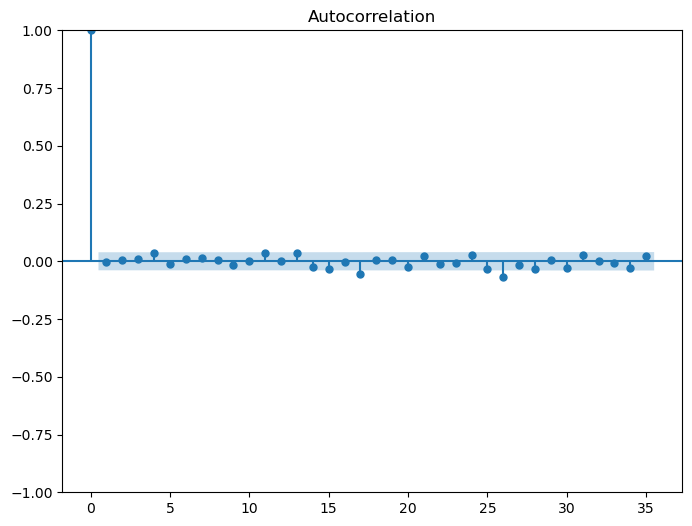

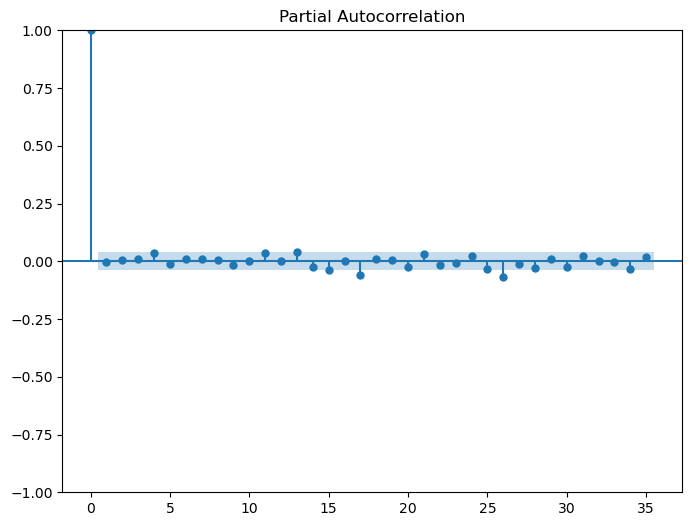

In [29]:
diff_acf=plot_acf(diff_val)
diff_pacf=plot_pacf(diff_val)

In [30]:
ADF_Test(diff_val)

ADF Test Statistics:  -50.25519163667982
P-value:  0.0
Number of lags:  0
Number of observations:  2513
Critical value 1% : -3.432954851668868
Critical value 5% : -2.862690812247962
Critical value 10% : -2.5673826214832887


### Inference: The p-value has become lesser than 0.05, so the differenced log transformed values are stationary. It can be used to train the ARIMA model

## Splitting into training and testing data:

In [31]:
train_data,test_data=diff_val[1:int(len(diff_val)*0.9)],diff_val[int(len(diff_val)*0.9):]

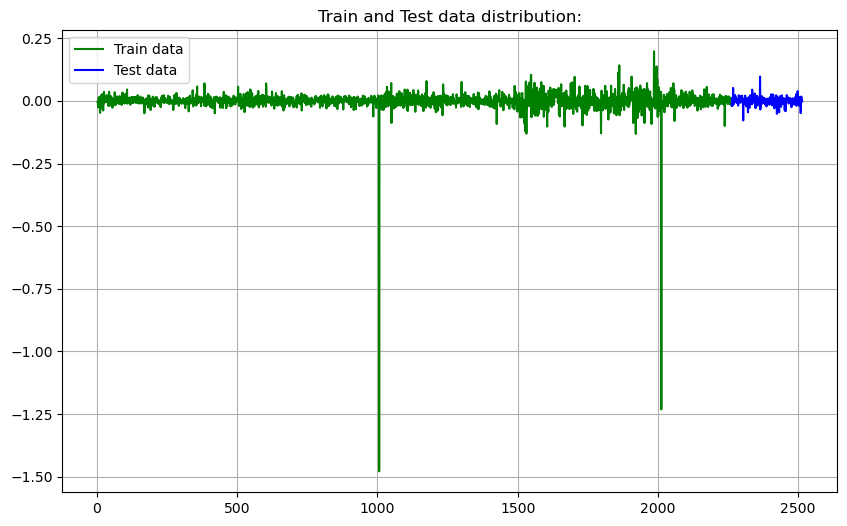

In [32]:

plt.figure(figsize=(10,6))
plt.title("Train and Test data distribution:")
plt.plot(train_data,color="green",label="Train data")
plt.plot(test_data,color="blue",label="Test data")
plt.legend()
plt.grid(True)
plt.show()

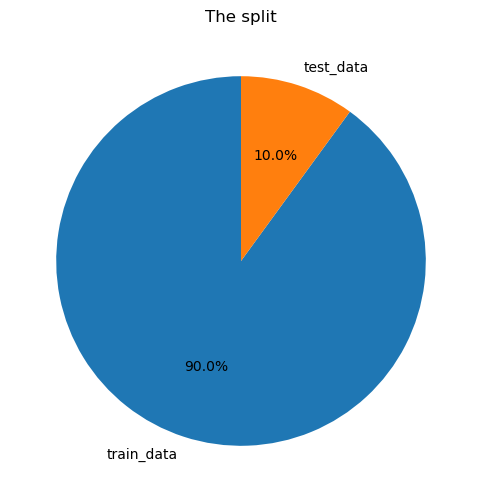

In [33]:
values=[len(train_data),len(test_data)]
labels=["train_data","test_data"]
plt.pie(values,labels=labels,autopct='%1.1f%%', startangle=90)
plt.title("The split")
plt.show()


In [34]:
!pip install pmdarima

In [35]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')


In [36]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,test='adf',max_p=3, max_q=3, m=1,d=None, seasonal=False,start_P=0, D=0,trace=True, error_action='ignore',suppress_warnings=True,stepwise=True)         
                     

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-7453.529, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-7451.552, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-7451.552, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-7449.821, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7451.531, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.775 seconds


### Best values for parameters p,d and q according to auto-ARIMA are: 0,0 and 0 and there's no seasonality.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2261
Model:                        SARIMAX   Log Likelihood                3727.765
Date:                Thu, 05 Dec 2024   AIC                          -7453.529
Time:                        21:00:25   BIC                          -7447.806
Sample:                             0   HQIC                         -7451.441
                               - 2261                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0022   3.52e-06    614.252      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):          41903432.60
Prob(Q):                              0.88   Pr

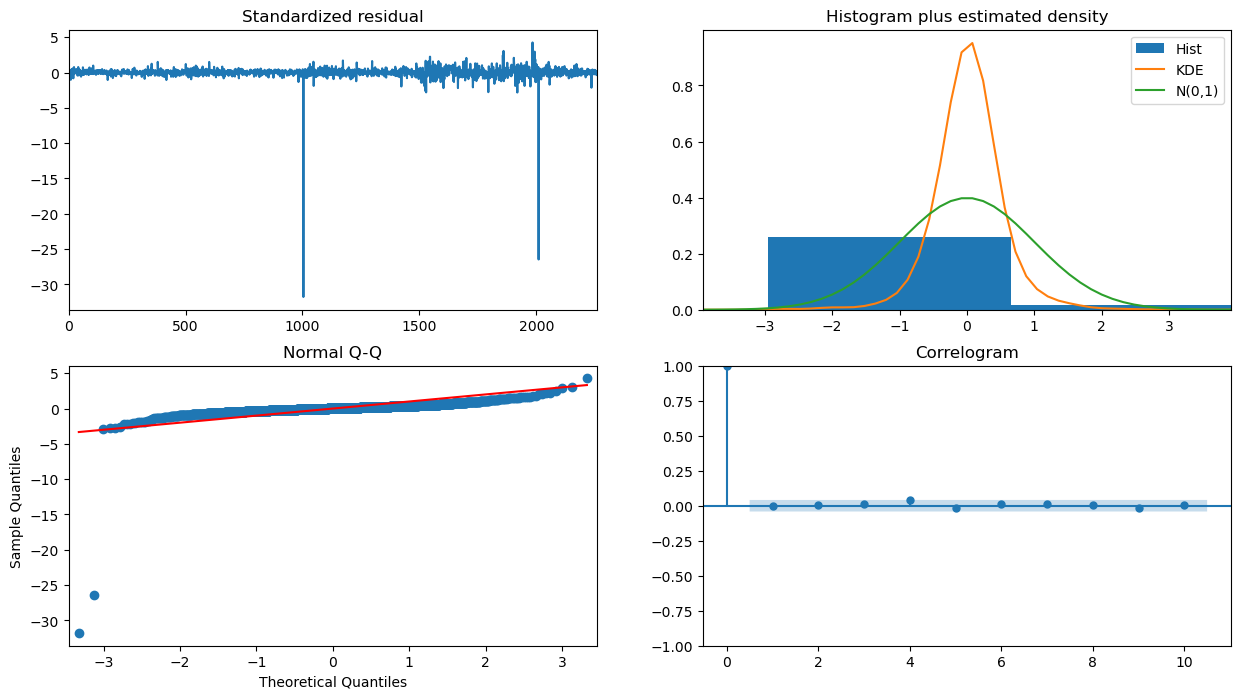

In [37]:
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [38]:
Final_ARIMA_model = ARIMA(train_data, order=(1,0,0)) 
fitted_model= Final_ARIMA_model.fit() 


### Making predictions on the testing data

In [39]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions=fitted_model.predict(start=start,end=end,typ='levels')
predictions.index=stocks.index[start:end+1]
print(predictions)


2261    0.000011
2262   -0.000041
2263   -0.000041
2264   -0.000041
2265   -0.000041
          ...   
2508   -0.000041
2509   -0.000041
2510   -0.000041
2511   -0.000041
2512   -0.000041
Name: predicted_mean, Length: 252, dtype: float64


<AxesSubplot:>

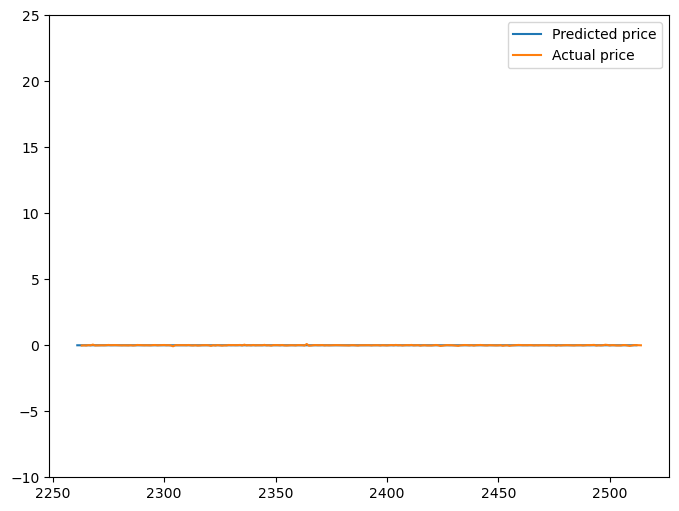

In [40]:
predictions.plot(legend=True,label='Predicted price')
plt.ylim(-10,25)
test_data.plot(legend=True,label='Actual price')


### Inference: The predicted price and the actual price are almost same.

<AxesSubplot:>

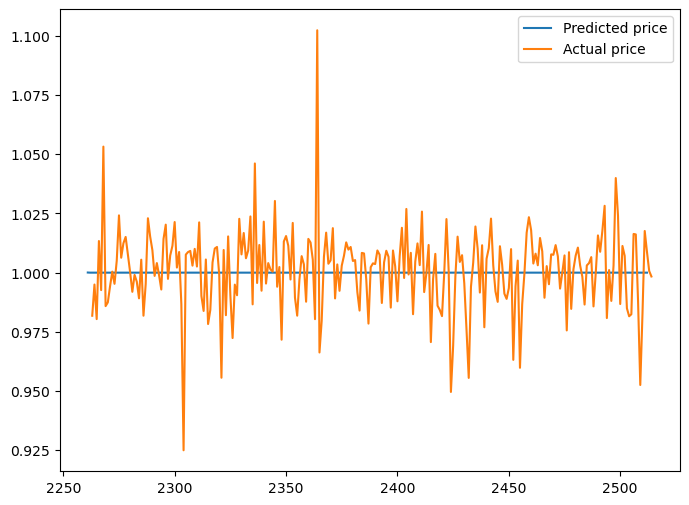

In [41]:
vals=np.exp(predictions)
test_vals=np.exp(test_data)
vals.plot(legend=True,label='Predicted price')
#plt.ylim(0,25)
test_vals.plot(legend=True,label='Actual price')

In [42]:
vals.mean()

0.9999596777973421

In [43]:
test_vals.mean()

1.0010451515237069

## MODEL EVALUATION

### Calculating Root Mean Squared Error(RMSE) of the model

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [45]:
mse=mean_squared_error(predictions,test_data)
rmse=sqrt(mse)
print("error in the model is:",rmse, "and the average value of the prediction is :",predictions.mean() )

error in the model is: 0.017014629418262074 and the average value of the prediction is : -4.032302088970492e-05


### The error of the model is just 0.017

## Retraining the model on the entire dataset

In [46]:
Final_ARIMA_model2 = ARIMA(log_val, order=(1,0,0)) 
fitted_model2= Final_ARIMA_model.fit() 


In [47]:
stocks.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2510,2024-11-22,165.850006,166.460007,163.899994,164.759995,38604600,0.0,0.0
2511,2024-11-25,166.089996,168.630005,165.610001,167.649994,33135300,0.0,0.0
2512,2024-11-26,167.630005,169.820007,167.580002,169.119995,20486700,0.0,0.0
2513,2024-11-27,169.000000,169.479996,168.020004,169.229996,19266500,0.0,0.0
2514,2024-11-29,168.500000,169.429993,167.160004,168.949997,14257200,0.0,0.0


## Predicting the future stock prices

### Predicting the stock prices for the first 30 days of 2025

In [48]:
future_dates=pd.date_range(start='2025-01-01',end='2025-01-31')
pred=fitted_model2.predict(start=len(log_val),end=len(log_val)+30)
pred.index=future_dates
pred

2025-01-01   -0.000041
2025-01-02   -0.000041
2025-01-03   -0.000041
2025-01-04   -0.000041
2025-01-05   -0.000041
2025-01-06   -0.000041
2025-01-07   -0.000041
2025-01-08   -0.000041
2025-01-09   -0.000041
2025-01-10   -0.000041
2025-01-11   -0.000041
2025-01-12   -0.000041
2025-01-13   -0.000041
2025-01-14   -0.000041
2025-01-15   -0.000041
2025-01-16   -0.000041
2025-01-17   -0.000041
2025-01-18   -0.000041
2025-01-19   -0.000041
2025-01-20   -0.000041
2025-01-21   -0.000041
2025-01-22   -0.000041
2025-01-23   -0.000041
2025-01-24   -0.000041
2025-01-25   -0.000041
2025-01-26   -0.000041
2025-01-27   -0.000041
2025-01-28   -0.000041
2025-01-29   -0.000041
2025-01-30   -0.000041
2025-01-31   -0.000041
Freq: D, Name: predicted_mean, dtype: float64

###  Since, the model was trained on log transformed data, the predictions in log scale as well.
### Converting it to its original scale by taking exponential of the predicted values.

In [49]:
pred = np.exp(pred) + 0.001

In [50]:
pred

2025-01-01    1.000959
2025-01-02    1.000959
2025-01-03    1.000959
2025-01-04    1.000959
2025-01-05    1.000959
2025-01-06    1.000959
2025-01-07    1.000959
2025-01-08    1.000959
2025-01-09    1.000959
2025-01-10    1.000959
2025-01-11    1.000959
2025-01-12    1.000959
2025-01-13    1.000959
2025-01-14    1.000959
2025-01-15    1.000959
2025-01-16    1.000959
2025-01-17    1.000959
2025-01-18    1.000959
2025-01-19    1.000959
2025-01-20    1.000959
2025-01-21    1.000959
2025-01-22    1.000959
2025-01-23    1.000959
2025-01-24    1.000959
2025-01-25    1.000959
2025-01-26    1.000959
2025-01-27    1.000959
2025-01-28    1.000959
2025-01-29    1.000959
2025-01-30    1.000959
2025-01-31    1.000959
Freq: D, Name: predicted_mean, dtype: float64

### Adding the values to the previous value of the original dataset, to undo the differencing and get the original predicted value.

In [51]:
forecast_original = np.cumsum(pred) + stocks['Close'].iloc[-1]


In [52]:
print(forecast_original)

2025-01-01    169.950956
2025-01-02    170.951916
2025-01-03    171.952875
2025-01-04    172.953835
2025-01-05    173.954794
2025-01-06    174.955754
2025-01-07    175.956713
2025-01-08    176.957673
2025-01-09    177.958632
2025-01-10    178.959592
2025-01-11    179.960551
2025-01-12    180.961511
2025-01-13    181.962470
2025-01-14    182.963430
2025-01-15    183.964389
2025-01-16    184.965349
2025-01-17    185.966308
2025-01-18    186.967267
2025-01-19    187.968227
2025-01-20    188.969186
2025-01-21    189.970146
2025-01-22    190.971105
2025-01-23    191.972065
2025-01-24    192.973024
2025-01-25    193.973984
2025-01-26    194.974943
2025-01-27    195.975903
2025-01-28    196.976862
2025-01-29    197.977822
2025-01-30    198.978781
2025-01-31    199.979741
Freq: D, Name: predicted_mean, dtype: float64


In [53]:
print(" average stock price for the first 30 days of 2025:",forecast_original.mean())

 average stock price for the first 30 days of 2025: 184.96534852601948


### The average stock price for the next 30 days in the year 2025 would be:198716.017 according to the model

## Evaluation metrics
### The Root Mean Squared Error in the model is: 0.017014629418262074

In [56]:
print(forecast_original)

2025-01-01    169.950956
2025-01-02    170.951916
2025-01-03    171.952875
2025-01-04    172.953835
2025-01-05    173.954794
2025-01-06    174.955754
2025-01-07    175.956713
2025-01-08    176.957673
2025-01-09    177.958632
2025-01-10    178.959592
2025-01-11    179.960551
2025-01-12    180.961511
2025-01-13    181.962470
2025-01-14    182.963430
2025-01-15    183.964389
2025-01-16    184.965349
2025-01-17    185.966308
2025-01-18    186.967267
2025-01-19    187.968227
2025-01-20    188.969186
2025-01-21    189.970146
2025-01-22    190.971105
2025-01-23    191.972065
2025-01-24    192.973024
2025-01-25    193.973984
2025-01-26    194.974943
2025-01-27    195.975903
2025-01-28    196.976862
2025-01-29    197.977822
2025-01-30    198.978781
2025-01-31    199.979741
Freq: D, Name: predicted_mean, dtype: float64


In [58]:
df=pd.DataFrame(forecast_original)

In [62]:
df.predicted_mean.dtype

dtype('float64')

In [70]:
data = pd.Series(
    forecast_original,
    index=pd.date_range(start="2025-01-01", end="2025-01-30"),
    name="predicted_mean"
)

# Extract only the values
first_30_pred = data.to_numpy()

print(first_30_pred)

[169.95095642 170.9519159  171.95287537 172.95383484 173.95479432
 174.95575379 175.95671326 176.95767274 177.95863221 178.95959168
 179.96055116 180.96151063 181.96247011 182.96342958 183.96438905
 184.96534853 185.966308   186.96726747 187.96822695 188.96918642
 189.97014589 190.97110537 191.97206484 192.97302431 193.97398379
 194.97494326 195.97590274 196.97686221 197.97782168 198.97878116]


In [71]:
first_30_pred.shape

(30,)

In [72]:
np.save("first_30_pred_model1.npy",first_30_pred)

## Model Enhancement and Forecasting Approach  

### While the ARIMA model effectively captures the variance in stock closing prices, it does not account for factors like stock name and associated sentiment, which significantly impact stock prices. 

### To improve prediction accuracy, we develop one more  tree-based model that incorporates these factors.

### The results from both models are combined to leverage their strengths, ensuring a more accurate final forecast.
